In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import datetime
from pandas_datareader import data as pdr
#we  will need it for intervals etc
import yfinance as yf
yf.pdr_override()

In [3]:
#set time duration
start = datetime.date(2018,12,31)
#end = datetime.date.today()
end = datetime.date(2020,10,10)
#print(start)
#print(end)


# Tickers list
# We can add and delete any ticker from the list to get desired ticker live data
#to consider ['LOGI','VZ','T','TMUS','TSLA','NFLX']
#['AG','SBSW','GOLD','AUY','AAPL','TEAM','FVRR','Z','CVS']

ticker_list=['AAPL','TEAM','FVRR','Z','CVS','WMT','AG','AUY']

#assign weights to the stocks
weights = np.array([0.2,0.1,0.1,0.1,0.2,0.1,0.1,0.1,])


#Create a Dataframe to store the adjusted close price of the stocks
#interval = '1mo' to get Adj Close price per month (intead of deafult, per day)
df = pd.DataFrame()

for ticker in ticker_list:
    print(ticker)
    df[ticker]= pdr.get_data_yahoo(ticker, start= start, end= end)['Adj Close']  




AAPL
[*********************100%***********************]  1 of 1 completed
TEAM
[*********************100%***********************]  1 of 1 completed
FVRR
[*********************100%***********************]  1 of 1 completed
Z
[*********************100%***********************]  1 of 1 completed
CVS
[*********************100%***********************]  1 of 1 completed
WMT
[*********************100%***********************]  1 of 1 completed
AG
[*********************100%***********************]  1 of 1 completed
AUY
[*********************100%***********************]  1 of 1 completed


In [4]:
print(df)

                  AAPL        TEAM        FVRR           Z        CVS  \
Date                                                                    
2018-12-31   38.585068   88.980003         NaN   31.580000  61.924316   
2019-01-02   38.629097   89.029999         NaN   30.350000  61.981030   
2019-01-03   34.781353   84.480003         NaN   29.920000  61.650242   
2019-01-04   36.266144   87.089996         NaN   30.799999  63.152973   
2019-01-07   36.185429   92.709999         NaN   30.850000  64.844749   
...                ...         ...         ...         ...        ...   
2020-10-05  116.500000  186.850006  157.919998  110.110001  58.950001   
2020-10-06  113.160004  189.880005  154.360001  104.989998  58.230000   
2020-10-07  115.080002  193.039993  152.550003  105.510002  59.419998   
2020-10-08  114.970001  188.779999  155.240005  105.040001  60.470001   
2020-10-09  116.970001  198.850006  161.550003  104.260002  59.400002   

                   WMT     AG       AUY  
Date    

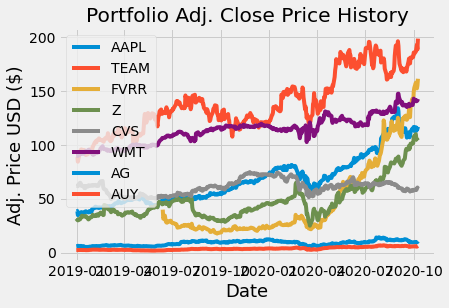

In [5]:
#Visually show the stock / portfolio
title = 'Portfolio Adj. Close Price History'
#Get tickers
#my_stocks = df.dropna()
my_stocks = df
#print(my_stocks)
#Create and plot the graph
for column in my_stocks.columns.values:
    plt.plot(my_stocks[column], label = column)

plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj. Price USD ($)',fontsize=18)
plt.legend(my_stocks.columns.values, loc = 'upper left')
plt.show()

In [6]:
#Show the daily sample of returns
returns = my_stocks.pct_change()
#monthly_returns = my_stocks.resample('M').ffill().pct_change()
print(returns)
#print(monthly_returns)

                AAPL      TEAM      FVRR         Z       CVS       WMT  \
Date                                                                     
2018-12-31       NaN       NaN       NaN       NaN       NaN       NaN   
2019-01-02  0.001141  0.000562       NaN -0.038949  0.000916  0.002040   
2019-01-03 -0.099607 -0.051106       NaN -0.014168 -0.005337 -0.005142   
2019-01-04  0.042689  0.030895       NaN  0.029412  0.024375  0.006246   
2019-01-07 -0.002226  0.064531       NaN  0.001623  0.026789  0.011772   
...              ...       ...       ...       ...       ...       ...   
2020-10-05  0.030791  0.011148  0.032089  0.017841  0.019367  0.009253   
2020-10-06 -0.028669  0.016216 -0.022543 -0.046499 -0.012214 -0.008251   
2020-10-07  0.016967  0.016642 -0.011726  0.004953  0.020436  0.001849   
2020-10-08 -0.000956 -0.022068  0.017634 -0.004455  0.017671  0.003336   
2020-10-09  0.017396  0.053343  0.040647 -0.007426 -0.017695  0.010045   

                  AG       AUY  
Date

In [7]:
#Create and show the annualized covariance matrix
#annual returns (252 trading days)
cov_matrix_annual = returns.cov() * 252
print(cov_matrix_annual)

          AAPL      TEAM      FVRR         Z       CVS       WMT        AG  \
AAPL  0.146295  0.064595  0.105871  0.096825  0.061579  0.045703  0.032134   
TEAM  0.064595  0.174633  0.102740  0.082622  0.032310  0.020414  0.035322   
FVRR  0.105871  0.102740  0.564825  0.179487  0.051677  0.040040  0.079781   
Z     0.096825  0.082622  0.179487  0.407697  0.058540  0.026943  0.076372   
CVS   0.061579  0.032310  0.051677  0.058540  0.109619  0.039679  0.010092   
WMT   0.045703  0.020414  0.040040  0.026943  0.039679  0.064456  0.016968   
AG    0.032134  0.035322  0.079781  0.076372  0.010092  0.016968  0.410953   
AUY   0.019519  0.021728  0.073867  0.052014  0.005059  0.019868  0.289344   

           AUY  
AAPL  0.019519  
TEAM  0.021728  
FVRR  0.073867  
Z     0.052014  
CVS   0.005059  
WMT   0.019868  
AG    0.289344  
AUY   0.329380  


In [8]:
#Calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual,weights))
print(port_variance)

0.07951273214341104


In [9]:
#Calcuate the portfolio volatility aka Standard Deviation
port_volatility = np.sqrt(port_variance)
print(port_volatility)

0.28198002082312684


In [10]:
#Calculate the annual portfolio return (252 trading days)
portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * 252
print(portfolioSimpleAnnualReturn)

0.5744103684115446


In [11]:
#Show the expected annual return, volatility (risk) and variance

var_per = str(round(port_variance,2)*100) + '%'
volatility_per = str(round(port_volatility,2)*100) + '%'
annual_return_per = str(round(portfolioSimpleAnnualReturn,2)*100) + '%'

print('Expected annual return: '+ annual_return_per)
print('Annual volatility (risk): '+ volatility_per)
print('Annual variance: '+ var_per)



Expected annual return: 56.99999999999999%
Annual volatility (risk): 28.000000000000004%
Annual variance: 8.0%


In [12]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [13]:
#Portfolio Optimization
#Calculate the expected returns and the annualised sample covariance matrix of asset returns

mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

#optimize for max sharpe ratio (how much excess return we recieve for someamount of volatility)
#it measures the performance of an ivestment vs an investment that is risk free (bonds etc)

ef = EfficientFrontier(mu,S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()

print(cleaned_weights)
ef.portfolio_performance(verbose=True)



OrderedDict([('AAPL', 0.48038), ('TEAM', 0.02132), ('FVRR', 0.29386), ('Z', 0.02474), ('CVS', 0.0), ('WMT', 0.0), ('AG', 0.0), ('AUY', 0.17971)])
Expected annual return: 113.2%
Annual volatility: 37.8%
Sharpe Ratio: 2.94


(1.1318237674249891, 0.37788732305355943, 2.9422097530046174)

In [14]:
#Get the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 12000)

allocation, leftover = da.lp_portfolio()
print('Discrete allocation: ', allocation)
print('Funds remaining: ${:.2f}'.format(leftover))

Discrete allocation:  {'AAPL': 49, 'TEAM': 1, 'FVRR': 22, 'Z': 3, 'AG': 4, 'AUY': 350}
Funds remaining: $1.00
